In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pdb

This NB contains the analysis of the merged .xlsx, containing all trades for all currencies

Parsing .xlsx

In [2]:
DF = pd.read_excel("/Users/ernesto/Google Drive/WORKING_FX/TRADE_BOT/09_04_2020/allpairs.merged.xlsx")

* Number of records per instrument:

In [3]:
my_tab = pd.crosstab(index=DF['id'], columns="count")
print(my_tab)

col_0        count
id                
AUD_CAD.bot     75
AUD_CHF.bot     88
AUD_JPY.bot     84
AUD_NZD.bot     73
AUD_USD.bot     65
CAD_CHF.bot     81
CAD_JPY.bot     94
CHF_JPY.bot     80
EUR_AUD.bot     54
EUR_CAD.bot     70
EUR_CHF.bot     35
EUR_GBP.bot     65
EUR_JPY.bot     58
EUR_NZD.bot     55
GBP_AUD.bot     38
GBP_CHF.bot     79
GBP_JPY.bot     45
GBP_NZD.bot     29
GBP_USD.bot     69
NZD_CAD.bot     95
NZD_JPY.bot     87
NZD_USD.bot     83
USD_CAD.bot     64
USD_CHF.bot     81
USD_JPY.bot     69


* Number of trades per outcome:

In [4]:
my_tab = pd.crosstab(index=DF['outcome'], columns="count")
print(my_tab)

col_0    count
outcome       
failure   1045
success    671


* Frequency per outcome:

In [5]:
print(pd.crosstab(DF['outcome'], columns="freq").apply(lambda r: r/r.sum(), axis=0))

col_0        freq
outcome          
failure  0.608974
success  0.391026


* Frequency of outcome per currency

In [6]:
print(pd.crosstab(DF['outcome'], DF['id']).apply(lambda r: r/r.sum(), axis=0))

id       AUD_CAD.bot  AUD_CHF.bot  AUD_JPY.bot  AUD_NZD.bot  AUD_USD.bot  \
outcome                                                                    
failure         0.64     0.545455     0.583333     0.684932     0.584615   
success         0.36     0.454545     0.416667     0.315068     0.415385   

id       CAD_CHF.bot  CAD_JPY.bot  CHF_JPY.bot  EUR_AUD.bot  EUR_CAD.bot  ...  \
outcome                                                                   ...   
failure     0.580247     0.531915       0.6375     0.648148     0.585714  ...   
success     0.419753     0.468085       0.3625     0.351852     0.414286  ...   

id       GBP_CHF.bot  GBP_JPY.bot  GBP_NZD.bot  GBP_USD.bot  NZD_CAD.bot  \
outcome                                                                    
failure     0.607595     0.644444     0.724138     0.565217     0.736842   
success     0.392405     0.355556     0.275862     0.434783     0.263158   

id       NZD_JPY.bot  NZD_USD.bot  USD_CAD.bot  USD_CHF.bot  USD_

* Frequency of outcome per type

In [7]:
print(pd.crosstab(DF['outcome'], DF['type']).apply(lambda r: r/r.sum(), axis=0))

type         long    short
outcome                   
failure  0.632251  0.58548
success  0.367749  0.41452


# Analysis of trades

## Transforming
We will transform the 2 outcome labels to digits

In [8]:
transl_dict={ 
        'S':1,
        'F':0,
        'success' : 1,
        'failure' : 0,
        True:1, 
        False:0
    }
def digit_binary(x,transl_dict,name):
    '''
    This function will replace the values in categorical
    binary variables by 1 and 0
    
    Parameters
    ----------
    transl_dict: dict
                 Keys will be the old categorical names and Values
                 will be 1 and 0. For example:
                 transl_dict={ 
                            'S':1,
                            'F':0, 
                            True:1, 
                            False:0
                            }
    name: str
          Name of the column to modify
        
    Returns
    -------
    The new label for the categorical variable
    '''
    return transl_dict[x[name]]

DF['outcome']=DF.apply(digit_binary,axis=1,transl_dict=transl_dict, name='outcome')

In [9]:
DF.shape

(1716, 22)

## max_min_rsi

### RSI in oversold

Let's analyse values that are above/below the oversold thresholds. For this I 've analysed
a range of thresholds and calculated the outcome categories frequency for this range

In [10]:
def get_freq_for_rsi(DF, rsi_long, rsi_short):
    """
    Function to get the frequency for categories
    of outcome variable for diff RSI thresholds
    
    Parameters
    ----------
    DF : pandas dataframe
    rsi_long : int
               RSI threshold for long trades
    rsi_short : int
                RSI threshold for short trades
    """
    print("processing with rsi_long:{0}; rsi_short:{1}".format(rsi_long,rsi_short))
    DFshort=DF.loc[(DF['max_min_rsi']>=rsi_short)& (DF['type']=="short")]
    DFlong=DF.loc[(DF['max_min_rsi']<=rsi_long)& (DF['type']=="long")]
    tomerge=[DFshort, DFlong]
    DFover=pd.concat(tomerge)
    my_tab = pd.crosstab(index=DFover['outcome'], columns="count")
    print(my_tab)
    freqs=pd.crosstab(DFover['outcome'], columns="freq").apply(lambda r: r/r.sum(), axis=0)
    print(freqs)
    return freqs
    

In [12]:
no_short = 60
no_long = 40
while no_short <= 80 and no_long>=20:
    freqs=get_freq_for_rsi(DF ,rsi_long=no_long, rsi_short=no_short)
    no_short=no_short+1
    no_long=no_long-1
    

processing with rsi_long:40; rsi_short:60
col_0    count
outcome       
0          827
1          516
col_0        freq
outcome          
0        0.615786
1        0.384214
processing with rsi_long:39; rsi_short:61
col_0    count
outcome       
0          801
1          496
col_0        freq
outcome          
0        0.617579
1        0.382421
processing with rsi_long:38; rsi_short:62
col_0    count
outcome       
0          750
1          465
col_0        freq
outcome          
0        0.617284
1        0.382716
processing with rsi_long:37; rsi_short:63
col_0    count
outcome       
0          707
1          436
col_0        freq
outcome          
0        0.618548
1        0.381452
processing with rsi_long:36; rsi_short:64
col_0    count
outcome       
0          661
1          397
col_0        freq
outcome          
0        0.624764
1        0.375236
processing with rsi_long:35; rsi_short:65
col_0    count
outcome       
0          604
1          367
col_0        freq
outcome   

### RSI not in oversold

In [13]:
DFnotinrsi=DF.loc[(DF['max_min_rsi']>30)& (DF['max_min_rsi']<70)]

In [14]:
DFnotinrsi.shape

(1166, 22)

* Number of trades per outcome:

In [15]:
my_tab = pd.crosstab(index=DFnotinrsi['outcome'], columns="count")
print(my_tab)

col_0    count
outcome       
0          699
1          467


* Frequency

In [16]:
print(pd.crosstab(DFnotinrsi['outcome'], columns="freq").apply(lambda r: r/r.sum(), axis=0))

col_0        freq
outcome          
0        0.599485
1        0.400515


## last time
This datetime variable represents the last time the price was over/below the entry price level. The first to do is to create a new datetime variable representing the difference (in days) between the entry datetime (start column) and the last time datetime.¶

First thing we need to do is to convert the variables `start` and `lasttime` to Datetime class

In [17]:
DF['lasttime']= pd.to_datetime(DF['lasttime'])
DF['start'] = pd.to_datetime(DF['start'])

In [18]:
DF['diff_lasttime']=(DF['start']-DF['lasttime'])
DF['diff_lasttime']=DF['diff_lasttime'].apply(lambda x: x.days)

Now, let's examine the distribution of this newly created diff variable in the 2 outcome categories

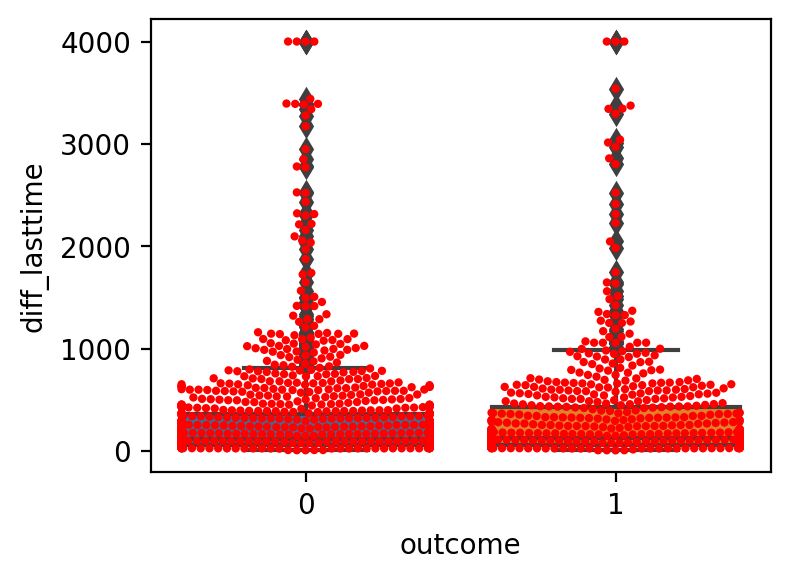

In [19]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

ax = sns.boxplot(x="outcome", y="diff_lasttime", data=DF, ax=ax)

sns.swarmplot(x="outcome", y="diff_lasttime", data=DF, color="red", size=3, ax=ax)

* Mean for each category

In [20]:
DF.groupby("outcome").agg({'diff_lasttime': 'mean'})

,diff_lasttime
outcome,
0,322.673684
1,346.138599


* Median for each category

In [21]:
DF.groupby("outcome").agg({'diff_lasttime': 'median'})

,diff_lasttime
outcome,
0,120
1,130


* Binning data
Let's bin the data into a certain number of categories

In [22]:
max_v=max(DF['diff_lasttime'])

custom_bins_array = np.arange(0, max_v, 150)

DF['diff_cat']=pd.cut(DF['diff_lasttime'], np.around(custom_bins_array))

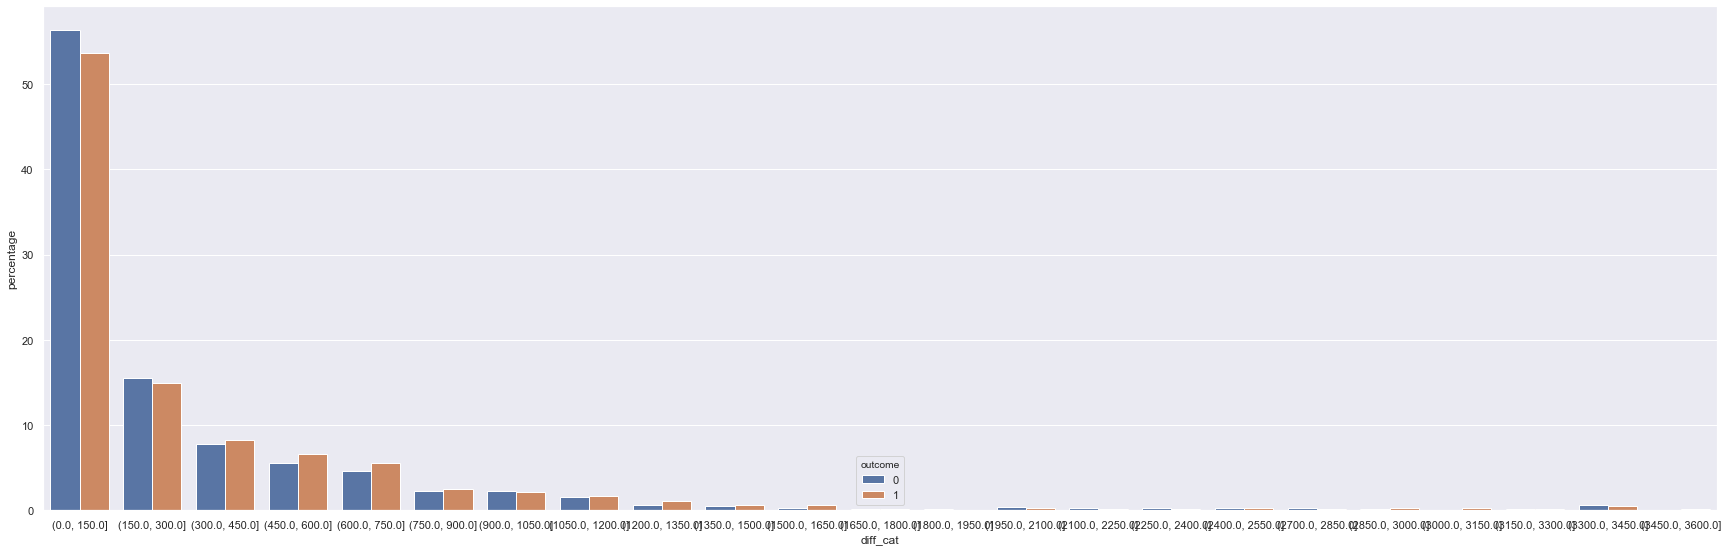

In [23]:
DF_counts = (DF.groupby(['outcome'])['diff_cat']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('diff_cat'))

sns.set(rc={'figure.figsize':(30,9.27)})

p = sns.barplot(x="diff_cat", y="percentage", hue='outcome', data=DF_counts)

# Pivots
This quantitative discrete variable is used for representing the number of times the price has tested this level. 

In [24]:
import ast
import pdb

def get_no_pivots(x):
    pivots = ast.literal_eval(x['pivots'])
    return len(pivots)

DF['no_pivots']=DF.apply(get_no_pivots,axis=1)

Let's start comparing the distribution of this variable for the different categories of the outcome variable.§m

* Mean for each category

In [25]:
DF.groupby("outcome").agg({'no_pivots': 'mean'})

,no_pivots
outcome,
0,4.821053
1,4.858420


* Median for each category

In [26]:
DF.groupby("outcome").agg({'no_pivots': 'median'})

,no_pivots
outcome,
0,4
1,4


* Binning data
Let's bin the data into a certain number of categories

In [27]:
max_v=max(DF['no_pivots'])

custom_bins_array = np.arange(0, max_v, 1)

DF['bounces peak_cat']=pd.cut(DF['no_pivots'], np.around(custom_bins_array))

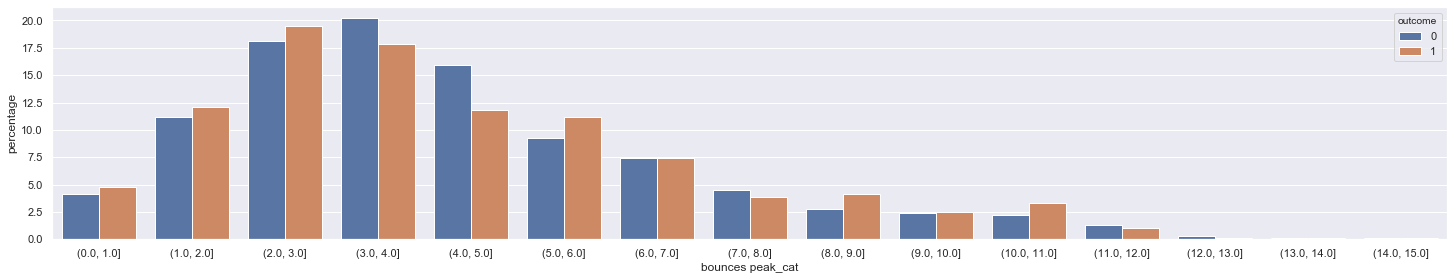

In [28]:
DF_counts = (DF.groupby(['outcome'])['bounces peak_cat']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('bounces peak_cat'))

sns.set(rc={'figure.figsize':(25,4.27)})

p = sns.barplot(x="bounces peak_cat", y="percentage", hue='outcome', data=DF_counts)

# pivots_lasttime
This quantitative discrete variable is used for representing the number of times the price has tested this level since last_time. Let's start comparing the distribution of this variable for the different categories of the outcome variable.¶

In [29]:
import ast
import pdb

def get_no_pivots_lasttime(x):
    pivots = ast.literal_eval(x['pivots_lasttime'])
    return len(pivots)

DF['no_pivots_lasttime']=DF.apply(get_no_pivots_lasttime,axis=1)

* Mean for each category

In [30]:
DF.groupby("outcome").agg({'no_pivots_lasttime': 'mean'})

,no_pivots_lasttime
outcome,
0,1.050718
1,0.952310


* Median for each category

In [31]:
DF.groupby("outcome").agg({'no_pivots_lasttime': 'median'})

,no_pivots_lasttime
outcome,
0,1
1,1


* Binning data
Let's bin the data into a certain number of categories. `np.arange(0,max_v,1)` where 1 controls the width of each bin

In [32]:
max_v=max(DF['no_pivots_lasttime'])

custom_bins_array = np.arange(0, max_v, 1)

DF['bounces peak_cat']=pd.cut(DF['no_pivots_lasttime'], np.around(custom_bins_array))

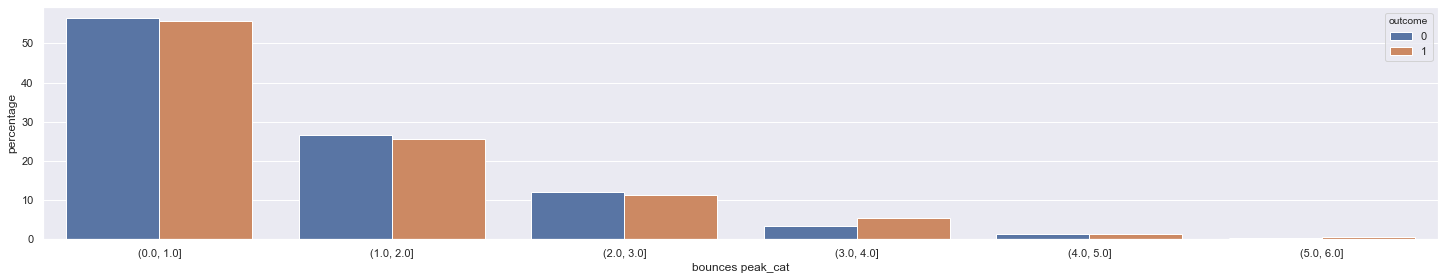

In [33]:
DF_counts = (DF.groupby(['outcome'])['bounces peak_cat']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('bounces peak_cat'))

sns.set(rc={'figure.figsize':(25,4.27)})

p = sns.barplot(x="bounces peak_cat", y="percentage", hue='outcome', data=DF_counts)

## total score

* Mean for each category

In [34]:
DF.groupby("outcome").agg({'total_score': 'mean'})

,total_score
outcome,
0,4026.181148
1,4062.458718


* Median for each category

In [35]:
DF.groupby("outcome").agg({'total_score': 'median'})

,total_score
outcome,
0,3759.7
1,3752.8


Now, let's examine the distribution of this newly created diff variable in the 2 outcome categories

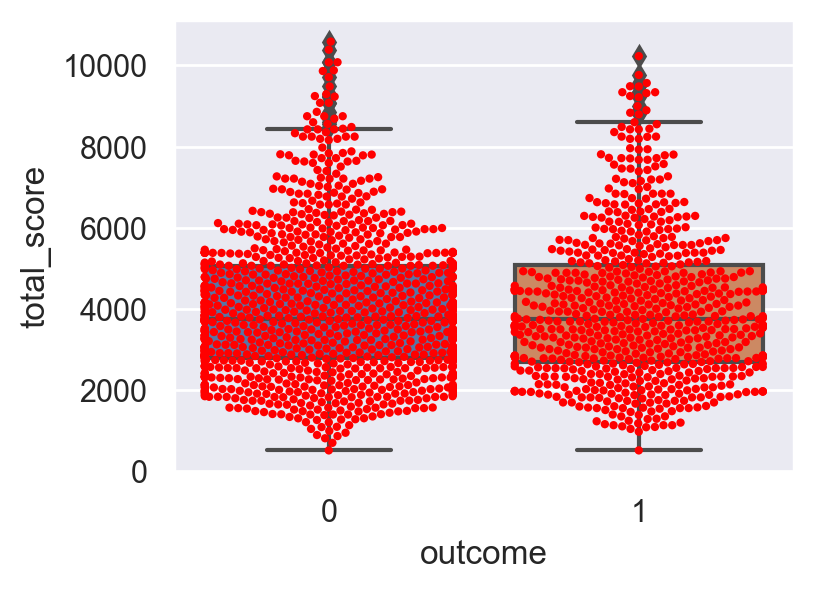

In [36]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

ax = sns.boxplot(x="outcome", y="total_score", data=DF, ax=ax)

sns.swarmplot(x="outcome", y="total_score", data=DF, color="red", size=3, ax=ax)

## score_lasttime

* Mean for each category

In [37]:
DF.groupby("outcome").agg({'score_lasttime': 'mean'})

,score_lasttime
outcome,
0,758.899713
1,733.107303


* Median for each category

In [38]:
DF.groupby("outcome").agg({'score_lasttime': 'median'})

,score_lasttime
outcome,
0,368.7
1,276.4


Now, let's examine the distribution of this newly created diff variable in the 2 outcome categories

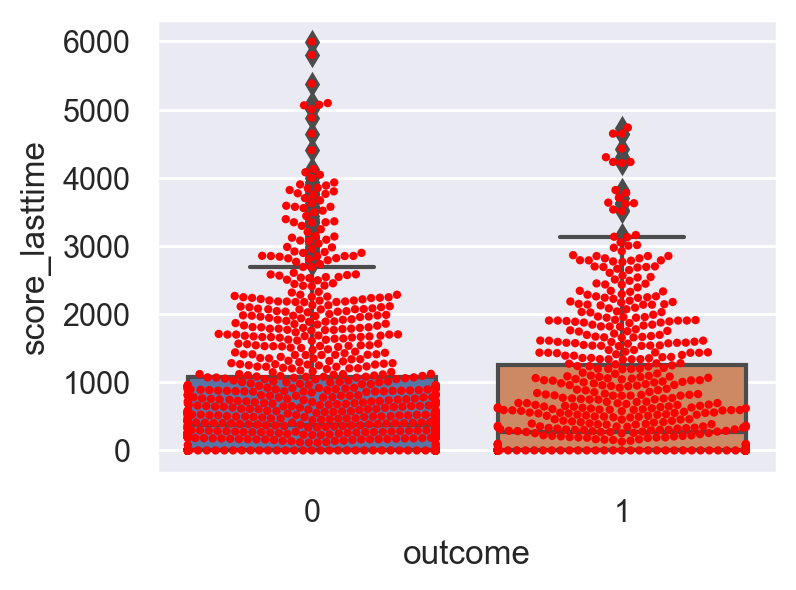

In [39]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

ax = sns.boxplot(x="outcome", y="score_lasttime", data=DF, ax=ax)

sns.swarmplot(x="outcome", y="score_lasttime", data=DF, color="red", size=3, ax=ax)

## score_pivot

Mean score per pivot

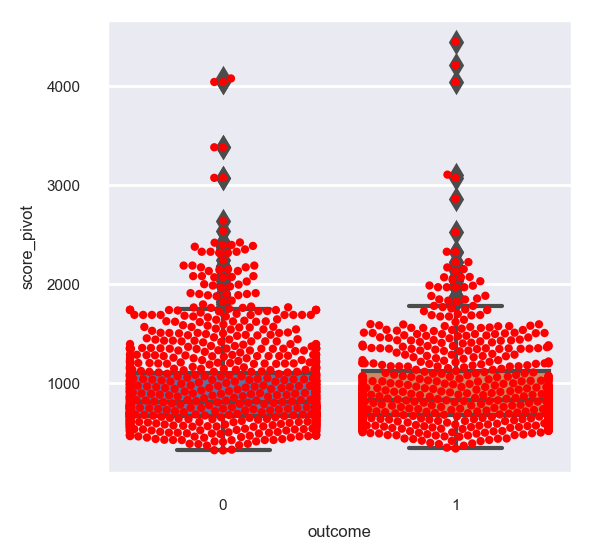

In [40]:
sns.set(font_scale=0.5)


fig, ax = plt.subplots(figsize=(3, 3), dpi=200)


sns.boxplot(x="outcome", y="score_pivot", data=DF, ax=ax)

sns.swarmplot(x="outcome", y="score_pivot", data=DF, color="red", size=3, ax=ax)

* Mean for each category

In [41]:
DF.groupby("outcome").agg({'score_pivot': 'mean'})

,score_pivot
outcome,
0,951.454464
1,956.532578


* Median for each category

In [42]:
DF.groupby("outcome").agg({'score_pivot': 'median'})

,score_pivot
outcome,
0,803.822222
1,823.675000


## score_pivot_lasttime

Mean score per pivot after lasttime

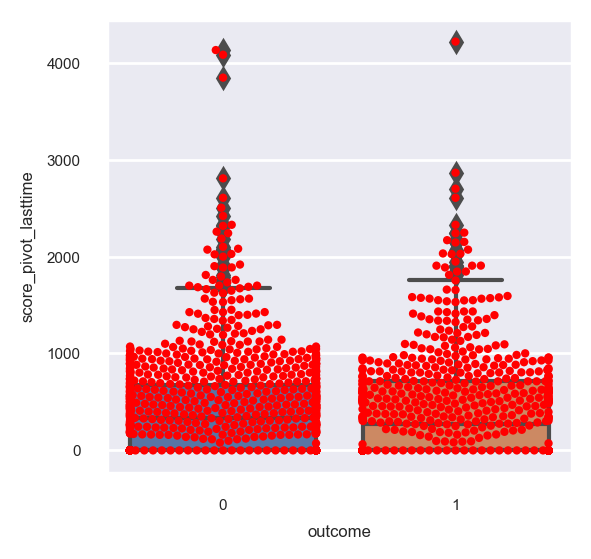

In [43]:
sns.set(font_scale=0.5)


fig, ax = plt.subplots(figsize=(3, 3), dpi=200)


sns.boxplot(x="outcome", y="score_pivot_lasttime", data=DF, ax=ax)

sns.swarmplot(x="outcome", y="score_pivot_lasttime", data=DF, color="red", size=3, ax=ax)

* Mean for each category

In [44]:
DF.groupby("outcome").agg({'score_pivot_lasttime': 'mean'})

,score_pivot_lasttime
outcome,
0,433.583874
1,431.207750


* Median for each category

In [45]:
DF.groupby("outcome").agg({'score_pivot_lasttime': 'median'})

,score_pivot_lasttime
outcome,
0,329.5
1,275.8
